# Linear and Quadratic Discriminant Analysis

In [1]:
%load_ext autoreload
%autoreload 2
#See bmes.ahmet/README.TXT for setting up BMESAHMETDIR environment variable.
import sys,os; sys.path.append(os.environ['BMESAHMETDIR']); import bmes

import sklearn
import numpy as np
from pylab import *

In [2]:
#create sample data (borrowed from Matlab's iris dataset)

X=[ [7,3.2], [6.4,3.2], [6.9,3.1], [5.5,2.3], [6.5,2.8], [5.7,2.8], [6.3,3.3], [4.9,2.4], [6.6,2.9], [5.2,2.7], [5,2], [5.9,3], [6,2.2], [6.1,2.9], [5.6,2.9], [6.7,3.1], [5.6,3], [5.8,2.7], [6.2,2.2], [5.6,2.5], [5.9,3.2], [6.1,2.8], [6.3,2.5], [6.1,2.8], [6.4,2.9], [6.6,3], [6.8,2.8], [6.7,3], [6,2.9], [5.7,2.6], [5.5,2.4], [5.5,2.4], [5.8,2.7], [6,2.7], [5.4,3], [6,3.4], [6.7,3.1], [6.3,2.3], [5.6,3], [5.5,2.5], [5.5,2.6], [6.1,3], [5.8,2.6], [5,2.3], [5.6,2.7], [5.7,3], [5.7,2.9], [6.2,2.9], [5.1,2.5], [5.7,2.8], [6.3,3.3], [5.8,2.7], [7.1,3], [6.3,2.9], [6.5,3], [7.6,3], [4.9,2.5], [7.3,2.9], [6.7,2.5], [7.2,3.6], [6.5,3.2], [6.4,2.7], [6.8,3], [5.7,2.5], [5.8,2.8], [6.4,3.2], [6.5,3], [7.7,3.8], [7.7,2.6], [6,2.2], [6.9,3.2], [5.6,2.8], [7.7,2.8], [6.3,2.7], [6.7,3.3], [7.2,3.2], [6.2,2.8], [6.1,3], [6.4,2.8], [7.2,3], [7.4,2.8], [7.9,3.8], [6.4,2.8], [6.3,2.8], [6.1,2.6], [7.7,3], [6.3,3.4], [6.4,3.1], [6,3], [6.9,3.1], [6.7,3.1], [6.9,3.1], [5.8,2.7], [6.8,3.2], [6.7,3.3], [6.7,3], [6.3,2.5], [6.5,3], [6.2,3.4], [5.9,3] ];
T_numbered= [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0];
groupnames=['versicolor','virginica'];
#conver T to the more useful names.
T = [groupnames[x] for x in T_numbered];

#converting X to a numpy array for additional numpy features.
X = np.array(X);

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X,T)

#coefficients are then available in:
A = lda.coef_[0] #linear
B = lda.intercept_ #constant

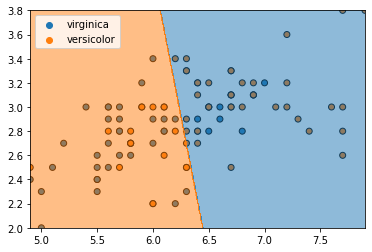

In [4]:
# create meshgrid using min/max values of the dataset.
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 500), np.linspace(X[:, 1].min(), X[:, 1].max(), 500))

# flatten meshgrid to array
Xmesh = np.column_stack((xx.flatten(), yy.flatten()))

# get LDA predictions from predicted X and reshape back to meshgrid shape
pred = lda.predict(Xmesh)
pred_numbered = [ groupnames.index(x) for x in pred ]; #contour expects the values to be numbers, rather than names.
pred_numbered = np.array(pred_numbered).reshape(xx.shape); #contour expects xx,yy,pred_numbered to have the same shape.


import seaborn
import matplotlib

seaborn.scatterplot(x=X[:,0], y=X[:,1], hue=T, edgecolor='black', linewidth=1);
# extract the colormap, so the regions can be colored in the same colors as the scatterplot
colormap = matplotlib.colors.ListedColormap(seaborn.color_palette().as_hex()[:2])
contourf(xx, yy, pred_numbered, alpha=0.5, cmap=colormap);

## Quadratic DA

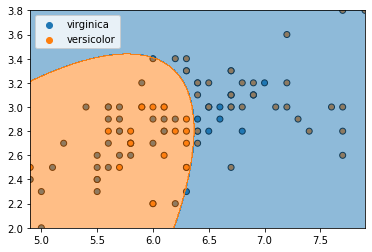

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X,T)

# get QDA predictions from predicted X and reshape back to meshgrid shape
pred = qda.predict(Xmesh)
pred_numbered = [ groupnames.index(x) for x in pred ]; #contour expects the values to be numbers, rather than names.
pred_numbered = np.array(pred_numbered).reshape(xx.shape); #contour expects xx,yy,pred_numbered to have the same shape.

import seaborn
import matplotlib

seaborn.scatterplot(x=X[:,0], y=X[:,1], hue=T, edgecolor='black', linewidth=1);
# extract the colormap, so the regions can be colored in the same colors as the scatterplot
colormap = matplotlib.colors.ListedColormap(seaborn.color_palette().as_hex()[:2])
contourf(xx, yy, pred_numbered, alpha=0.5, cmap=colormap);

## Classification Performance Metrics

In [6]:
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

lda.fit(X, T)
pred = lda.predict( X )


accuracy = (pred == T).sum() / pred.shape[0];
print('accuracy: %.1f%%'%(accuracy*100)  )

accuracy: 75.0%


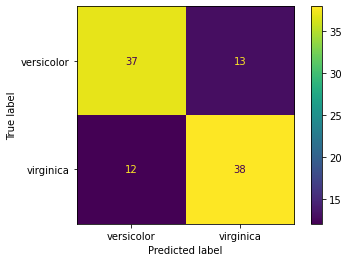

In [7]:
cm = sklearn.metrics.confusion_matrix(T, pred)

disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=groupnames)
disp.plot();

In [8]:
tp, fn, fp, tn = cm.ravel();

accuracy = (tp + tn) / (tp + tn + fp + fn)
print('accuracy: %.1f%%'%(accuracy*100)  )

accuracy: 75.0%
